# Geopandas - Creating Geometries into a Dataframe

<div style='background:#B1F9E3; color:#000000' class= 'alert alert-box'>
    <b>refer:</b>
<a href='https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html#Creating-geometries-into-a-GeoDataFrame'>
     https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html#Creating-geometries-into-a-GeoDataFrame
    </a>
</div>

In [1]:
# Step 1: Let's Create empty GeoDataframe

# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
bu = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(bu)

Empty GeoDataFrame
Columns: []
Index: []


In [2]:
# Step 2: Let’s create a new column called geometry that will contain our Shapely objects

# Create a new column called 'geometry' to the GeoDataFrame
bu['geometry'] = None

# Let's again see what's inside
print(bu)

Empty GeoDataFrame
Columns: [geometry]
Index: []


C:\Users\wwwsu\AppData\Local\Temp\ipykernel_3772\410328825.py:4: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  bu['geometry'] = None


In [3]:
# Step 3: Let’s create a Shapely Polygon repsenting the a particular building that we can later insert to our GeoDataFrame

# Coordinates of the DOS Geography building in Decimal Degrees
coordinates = [(76.620659675113, 12.313946426567359),
               (76.6207465265104, 12.313948667824983),
               (76.62075189092984, 12.31366499841084),
               (76.6213366124901, 12.313675480428103),
               (76.62133258917666, 12.313597520424286),
               (76.62067094672325, 12.313580768725606)
              ]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((76.620659675113 12.313946426567359, 76.6207465265104 12.313948667824983, 76.62075189092984 12.31366499841084, 76.6213366124901 12.313675480428103, 76.62133258917666 12.313597520424286, 76.62067094672325 12.313580768725606, 76.620659675113 12.313946426567359))


In [4]:
#insert the polygon into ‘geometry’ column of BU of our GeoDataFrame at position 0:
bu.loc[0, 'geometry'] = poly

# Let's see what we have now
print(bu)

                                            geometry
0  POLYGON ((76.62066 12.31395, 76.62075 12.31395...


In [5]:
#let’s add another column to our GeoDataFrame called location with text "DOS in Geography" that describes the location of the feature.
# Add a new column and insert data
bu.loc[0, 'location'] = 'DOS in Geography'

# Let's check the data
print(bu)

                                            geometry          location
0  POLYGON ((76.62066 12.31395, 76.62075 12.31395...  DOS in Geography


In [6]:
# Since we created new GeoDataFrame, CRS is absent
print(bu.crs)

None


In [7]:
# Let’s add a crs for our GeoDataFrame.
# A Python module called fiona has a nice function called from_epsg()
# for passing the coordinate reference system information for the GeoDataFrame.
# Next we will use that and determine the projection to WGS84 (epsg code: 4326):

In [8]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
bu.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(bu.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [9]:
# Finally, we can export the GeoDataFrame using .to_file() -function
bu.to_file('builtup_footprint.shp')

In [10]:
#reading shapefile
mybu = gpd.read_file('builtup_footprint.shp')

In [11]:
mybu

,location,geometry
0,DOS in Geography,"POLYGON ((76.62066 12.31395, 76.62075 12.31395..."


In [12]:
mybu.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
mybu.crs.name

'WGS 84'

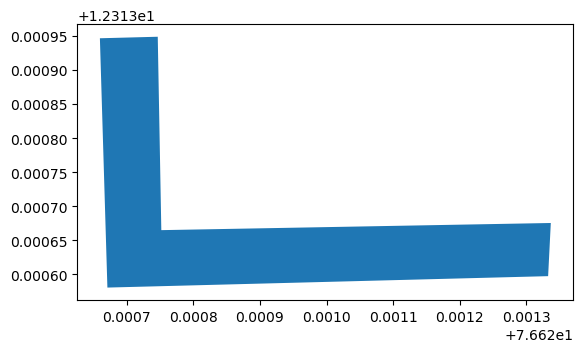

In [14]:
mybu.plot();

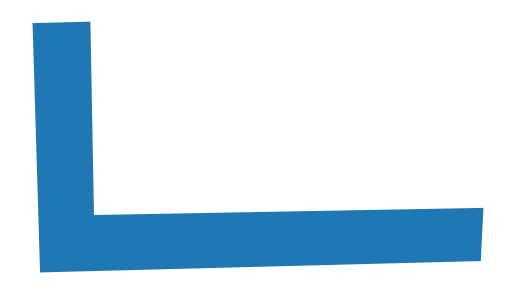

In [15]:
ax = mybu.plot()
ax.set_axis_off()